In [5]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

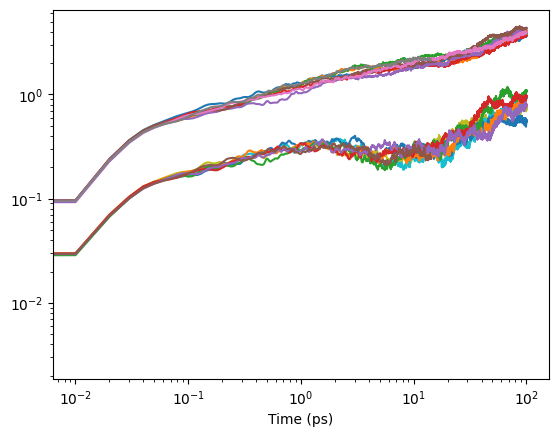

[3.044171409757946e-07, 4.4307597840957986e-07, 3.489891146524033e-07, 3.670685901554421e-07, 4.91701506285478e-07, 4.7140938623001985e-07, 3.4156935097506736e-07, -1.9005345088131508e-07]
[7.937791648788927e-08, 1.427126723894705e-07, 5.326474685178699e-08, 1.1986929453115724e-07, 1.5285493553339425e-07, 1.2164372295416123e-07, 9.569887560153618e-08, -2.559365413511263e-07]
[3.83503567 3.10467158 6.55197171 3.06224035 3.21678528 3.8753285
 3.56920966 0.74258037]
3.494727888927938


In [8]:
dt = 0.001
record_freq = 10
linearModel = LinearRegression()

def D_func(slope):
    # Slope in A2 /ps
    # Output in     cm2/s
    return (slope / 6) * 10**12 / (10**(8*2))

D = []
Dj = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al70_0/msd*-900.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    plt.plot(time, msd)
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    # plt.plot(time, linearModel.predict(time.reshape(-1,1)))
    D.append(D_func(linearModel.coef_[0]))

for mscd_file in glob.glob('data/LLZO_Ia3d_Al70_0/mscd*-900.out'):
    df = pd.read_csv(mscd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    mscd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(mscd.shape[0]))
    plt.plot(time, mscd)
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), mscd[int(10/(dt*record_freq)):])
    # plt.plot(time, linearModel.predict(time.reshape(-1,1)))
    Dj.append(D_func(linearModel.coef_[0]))

plt.xlabel('Time (ps)')
plt.xscale('log')
plt.yscale('log')
plt.show()
print(D)
print(Dj)
print(np.array(D) / np.array(Dj))
print(np.mean(np.array(D) / np.array(Dj)))

nan
1.448054560680374e-07


c:\Users\Evan Truesdale\Documents\Personal Files\Ion Transport Research\Data\venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Evan Truesdale\Documents\Personal Files\Ion Transport Research\Data\venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2.438002904015656e-07
6.300052039227106e-07
1.2595269706486493e-06
nan
nan


c:\Users\Evan Truesdale\Documents\Personal Files\Ion Transport Research\Data\venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Evan Truesdale\Documents\Personal Files\Ion Transport Research\Data\venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2.2003783254335422e-07
6.041991502320291e-07
1.1208421256185964e-06


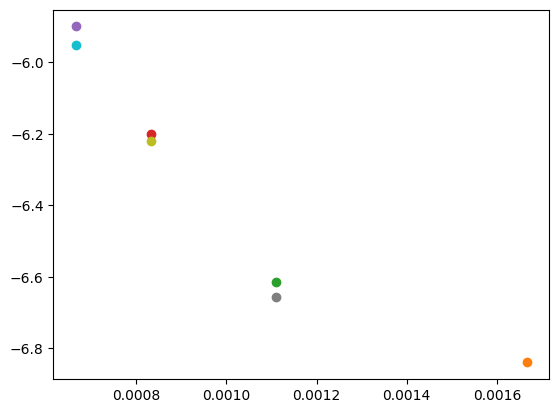

In [7]:
dt = 0.004
record_freq = 10
linearModel = LinearRegression()

def D_func(slope):
    return (slope / 6) * 10**12 / (10**(8*2))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_1/msd*-300.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/300, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_1/msd*-600.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/600, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_1/msd*-900.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/900, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_1/msd*-1200.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/1200, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_1/msd*-1500.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/1500, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_0/msd*-300.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/300, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_0/msd*-600.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/600, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_0/msd*-900.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/900, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_0/msd*-1200.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/1200, np.log10(np.mean(D)))

D = []
for msd_file in glob.glob('data/LLZO_Ia3d_Al30_0/msd*-1500.out'):
    df = pd.read_csv(msd_file, sep=" ", low_memory=False)
    pos = np.array(df['Time-averaged'])
    msd = pos[6::5].astype('float64')
    time = dt*record_freq*np.array(range(msd.shape[0]))
    linearModel.fit(time[int(10/(dt*record_freq)):].reshape(-1,1), msd[int(10/(dt*record_freq)):])
    D.append(D_func(linearModel.coef_[0]))

print(np.mean(D))
plt.scatter(1/1500, np.log10(np.mean(D)))
plt.show()